# Exploratory Data Analysis - Alternative plots (oral included)

In [2]:
# Importing the libraries
from rdkit import Chem, rdBase
from rdkit.Chem import Draw, Descriptors, PandasTools, AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.SaltRemover import SaltRemover, InputFormat

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
import session_info

import matplotlib
from matplotlib.patches import Rectangle
from matplotlib.text import OffsetFrom
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
drugs_db_route_merged = pd.read_csv("../data/correlation_dataset.csv")

# Dropping unwanted columns
drugs_db_route_merged = drugs_db_route_merged.drop(drugs_db_route_merged.columns[drugs_db_route_merged.columns.str.contains("follow")], axis=1)
drugs_db_route_merged = drugs_db_route_merged.drop(drugs_db_route_merged.columns[drugs_db_route_merged.columns.str.contains("Unnamed")], axis=1)

# taking a peek?
print("The shape is: ",drugs_db_route_merged.shape)
drugs_db_route_merged.head()

The shape is:  (563, 18)


,active_ingredient_moiety,nda_bla,approval_year,active,DrugBank ID,Drug Groups,SMILES,Name,Drug Type,route,mw,n_hba,n_hbd,logp,tpsa,rb,h_sum,countplot
0,troglitazone,NDA,1997,troglitazone,DB00197,approved; investigational; withdrawn,CC1=C(C)C2=C(CCC(C)(COC3=CC=C(CC4SC(=O)NC4=O)C...,Troglitazone,SmallMoleculeDrug,oral,441.160994,6,2,4.37426,84.86,5,8,3
1,imiquimod,NDA,1997,imiquimod,DB00724,approved; investigational,CC(C)CN1C=NC2=C1C1=C(C=CC=C1)N=C2N,Imiquimod,SmallMoleculeDrug,topical,240.137497,4,1,2.82270,56.73,2,5,3
2,anagrelide hydrochloride,NDA,1997,anagrelide,DB00261,approved,ClC1=CC=C2N=C3NC(=O)CN3CC2=C1Cl,Anagrelide,SmallMoleculeDrug,oral,254.996617,3,1,1.92630,44.70,0,4,3
3,nelfinavir mesylate,NDA,1997,nelfinavir,DB00220,approved,[H][C@@]12CCCC[C@]1([H])CN(C[C@@H](O)[C@H](CSC...,Nelfinavir,SmallMoleculeDrug,oral,567.313078,6,4,4.74762,101.90,9,10,3
4,delavirdine mesylate,NDA,1997,delavirdine,DB00705,approved,CC(C)NC1=C(N=CC=C1)N1CCN(CC1)C(=O)C1=CC2=C(N1)...,Delavirdine,SmallMoleculeDrug,oral,456.194360,6,3,2.71710,110.43,6,9,3


In [4]:
# Separating the dataset:
drugs_oral = drugs_db_route_merged[drugs_db_route_merged.route.str.contains('oral')==True].reset_index(drop=True)
drugs_oral.route.unique() 

array(['oral', 'nasal oral', 'oral injection', 'oral intravenous',
       'injection oral', 'oral topical', 'intramuscular oral',
       'oral intramuscular', 'intravenous subcutaneous oral',
       'subcutaneous oral', 'oral inhalation'], dtype=object)

In [5]:
veber_pallete = {
    "bars": "#dc3d04",
    "patch": "#fa5300",
    "arrow": "#a73e13",
    "vline": "#264653",
    "countplot_bar1": "#E3564F",
    "countplot_bar2": "#F77D44",
    "line1": "#fe7c25",
    "line2": "#eac77b"
}

lipinski_pallete = {
    "bars": "#264653",
    "patch": "g",
    "arrow": "g",
    "vline": "#e76f51",
    "countplot_bar1": "#264653",
    "countplot_bar2": "#387a6c"
}

color_palette = lipinski_pallete

## EDA (Oral vs Total)

In [6]:
sns.set_context("poster")
pd.options.display.max_colwidth = 1000

In [7]:
# Defining the distribtuion plot function

def dist_graph(df, df_oral, col_name, title, xlabel, binwidth, threshold, xlim, ax, fig, legend_position):
    dist = sns.histplot(
        data = df, 
        x = col_name, 
        color = color_palette["bars"], 
        binwidth = binwidth,
        linewidth=2,
        alpha=0.1,
        label="All Drugs",
    )


    # oral plot
    dist = sns.histplot(
    data = drugs_oral, 
    x = col_name, 
    color = color_palette["countplot_bar2"], 
    binwidth = binwidth,
    linewidth=2,
    alpha=0.95,
    label="Oral Drugs",
    )

    ax.axvline(threshold,color = color_palette["vline"], linestyle = "--")
    ax.set_xlim(*xlim) # setting the xlim
    fig.suptitle(title, fontsize = 33, fontweight=1000)
    #dist.set_title("FDA approved drugs (1997-2021)", fontsize=18, fontweight=1000)
    dist.set_xlabel(xlabel, fontweight=1000, fontsize=25)
    dist.set_ylabel("")

    # tick sizes and bold
    plt.setp(ax.get_xticklabels(), fontsize=26, fontweight=627)
    plt.setp(ax.get_yticklabels(), fontsize=26, fontweight=624)
    plt.legend(loc=legend_position, fontsize=20)

    # adding a shaded region
    ax.add_patch(Rectangle((-100, 0),
                            threshold+100, 5000,
                            fc =color_palette["patch"], 
                            ec ='none',
                            lw = 10, alpha = .1))

## Lipinski - Distribution Plots

### 1) Molecular Weight distribution

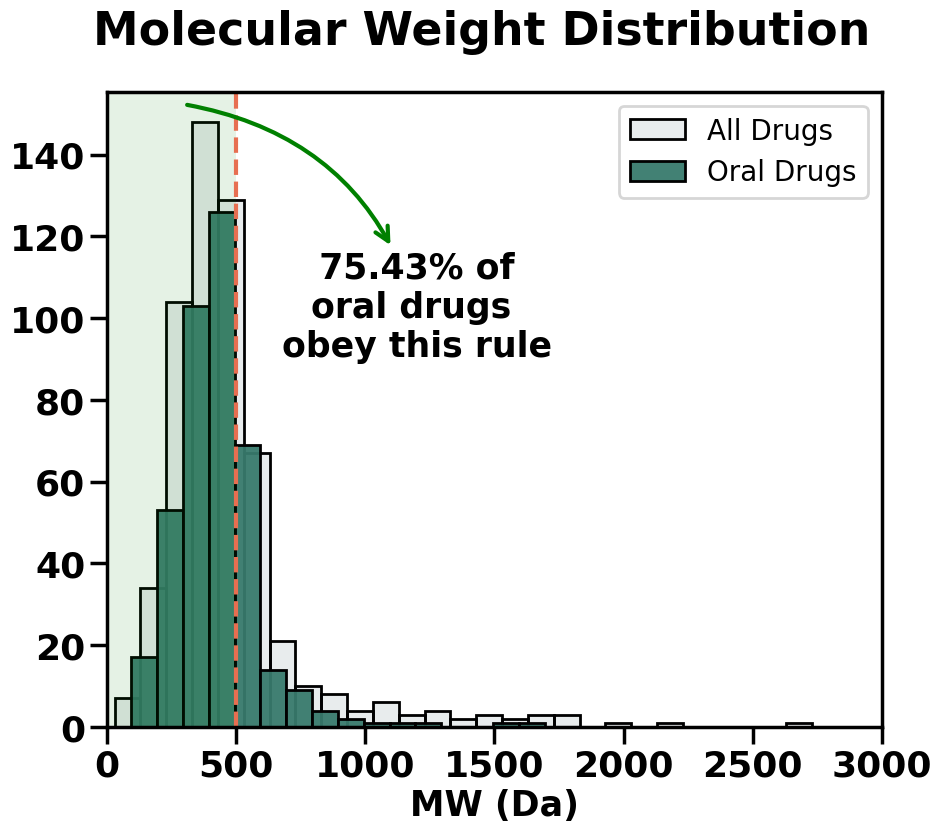

In [8]:
fig, ax = plt.subplots(figsize = (10,8.25))

dist_graph(
    df=drugs_db_route_merged, 
    df_oral = drugs_oral,
    col_name="mw", 
    title="Molecular Weight Distribution", 
    xlabel="MW (Da)", 
    binwidth=100, 
    threshold=500, 
    xlim=(0, 3000), 
    ax=ax, 
    fig=fig,
    legend_position='upper right'
)

# annotating the information about how % obey the lipinski's rules
param = ((drugs_oral.mw <=500).sum())/drugs_oral.shape[0]

ax.annotate(f' {param:.2%} of \noral drugs \nobey this rule',
            xy=(0.1, 0.98), xycoords='axes fraction',
            xytext=(0.4, 0.75), textcoords='axes fraction',
            arrowprops={"arrowstyle":"<-", "color":color_palette["arrow"], "lw":3, "connectionstyle":"arc3,rad=0.3"},
            verticalalignment='top', fontsize=25, fontweight=1000,
            horizontalalignment="center")
# saving plot
fig.savefig("../imgs/lipinski/dist_mw_oral_vs_total.png", dpi=300)

### 2) H-Bond Donors

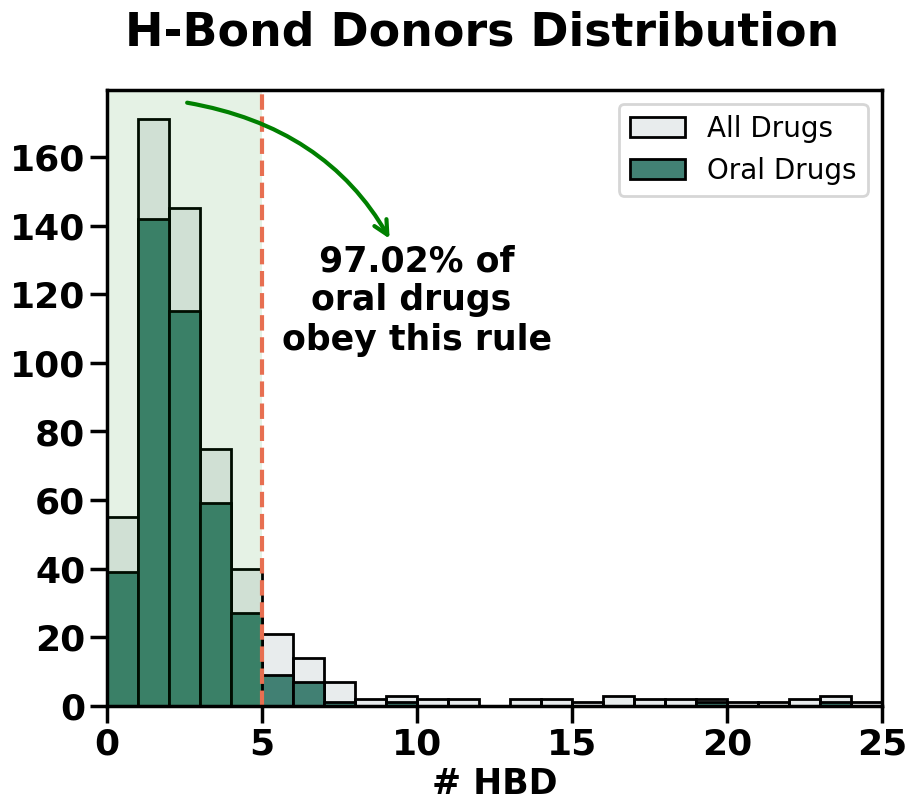

In [9]:
fig, ax = plt.subplots(figsize = (10,8))

dist_graph(
    df=drugs_db_route_merged, 
    df_oral=drugs_oral,
    col_name="n_hbd", 
    title="H-Bond Donors Distribution", 
    xlabel="# HBD", 
    binwidth=1, 
    threshold=5, 
    xlim=(0, 25), 
    ax=ax, 
    fig=fig,
    legend_position='upper right'
)

# annotating the information about how % obey the lipinski's rules
param = ((drugs_oral.n_hbd <= 5).sum())/drugs_oral.shape[0]

ax.annotate(f' {param:.2%} of \noral drugs \nobey this rule',
            xy=(0.1, 0.98), xycoords='axes fraction',
            xytext=(0.4, 0.75), textcoords='axes fraction',
            arrowprops={"arrowstyle":"<-", "color":color_palette["arrow"], "lw":3, "connectionstyle":"arc3,rad=0.3"},
            verticalalignment='top', fontsize=25, fontweight=1000,
            horizontalalignment="center")
# saving plot
fig.savefig("../imgs/lipinski/dist_hbd_oral.png", dpi=300)

### 3) H-Bond Acceptors

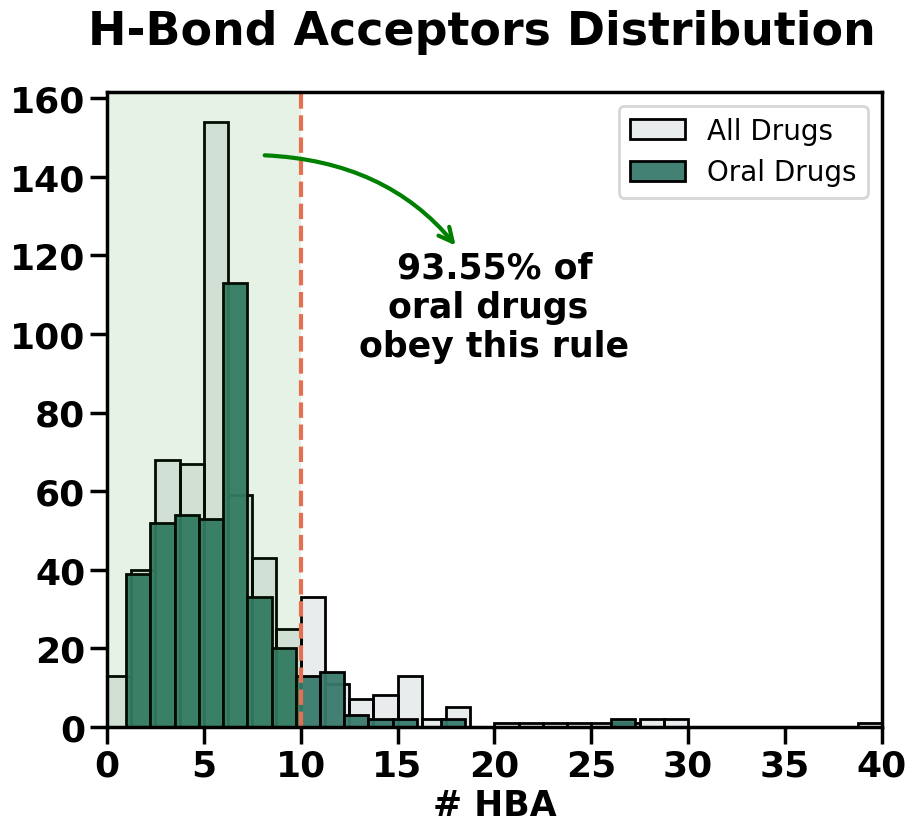

In [10]:
fig, ax = plt.subplots(figsize = (10,8.25))

dist_graph(
    df=drugs_db_route_merged, 
    df_oral= drugs_oral,
    col_name="n_hba", 
    title="H-Bond Acceptors Distribution", 
    xlabel="# HBA", 
    binwidth=1.25, 
    threshold=10, 
    xlim=(0, 40), 
    ax=ax, 
    fig=fig,
    legend_position='upper right'
)

# annotating the information about how % obey the lipinski's rules
param = ((drugs_oral.n_hba <= 10).sum())/drugs_oral.shape[0]

ax.annotate(f' {param:.2%} of \noral drugs \nobey this rule',
            xy=(0.2, 0.9), xycoords='axes fraction',
            xytext=(0.5, 0.75), textcoords='axes fraction',
            arrowprops={"arrowstyle":"<-", "color":color_palette["arrow"], "lw":3, "connectionstyle":"arc3,rad=0.3"},
            verticalalignment='top', fontsize=25, fontweight=1000,
            horizontalalignment="center")
# saving plot
fig.savefig("../imgs/lipinski/dist_hba_oral.png", dpi=300)

### 4) LogP Distribution

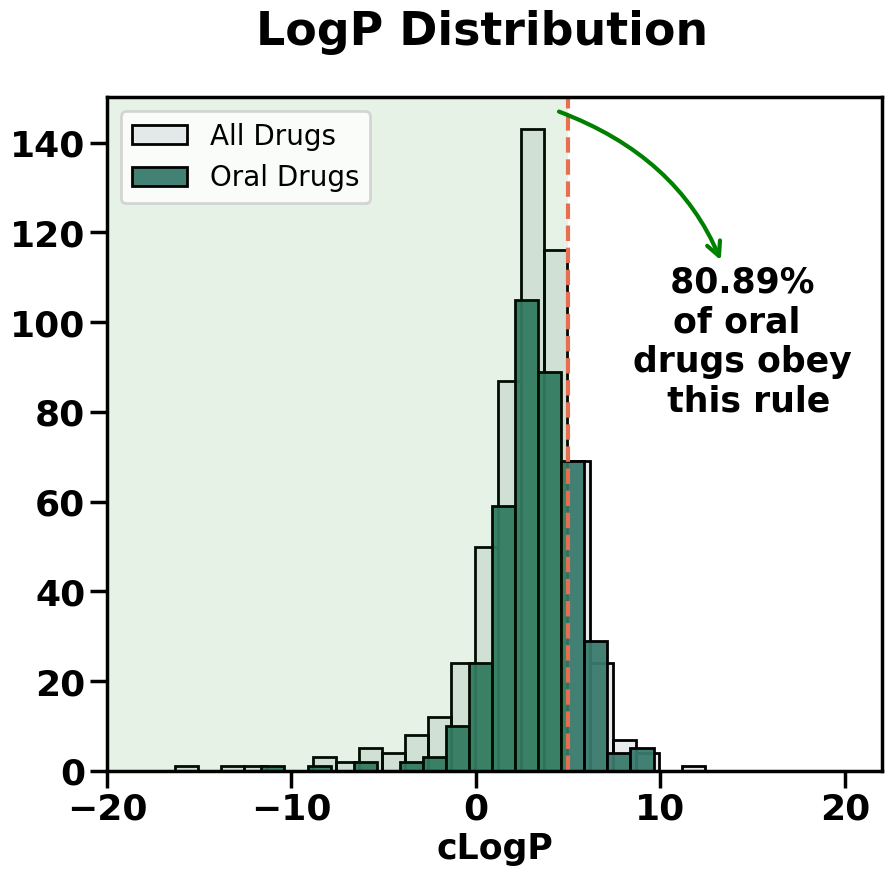

In [11]:
fig, ax = plt.subplots(figsize = (10,8.75))

dist_graph(
    df=drugs_db_route_merged, 
    df_oral= drugs_oral,
    col_name="logp", 
    title="LogP Distribution", 
    xlabel="cLogP", 
    binwidth=1.25, 
    threshold=5, 
    xlim=(-20, 22), 
    ax=ax, 
    fig=fig,
    legend_position='upper left'
)

# annotating the information about how % obey the lipinski's rules
param = ((drugs_oral.logp <= 5).sum())/drugs_oral.shape[0]

ax.annotate(f' {param:.2%} \nof oral \ndrugs obey\n this rule',
            xy=(0.58, 0.98), xycoords='axes fraction',
            xytext=(0.82, 0.75), textcoords='axes fraction',
            arrowprops={"arrowstyle":"<-", "color":color_palette["arrow"], "lw":3, "connectionstyle":"arc3,rad=0.3"},
            verticalalignment='top', fontsize=25, fontweight=1000,
            horizontalalignment="center")
# saving plot
fig.savefig("../imgs/lipinski/dist_logp_oral.png", dpi=300)

## Veber - Distribution Plots

In [12]:
color_palette = veber_pallete 

### TPSA

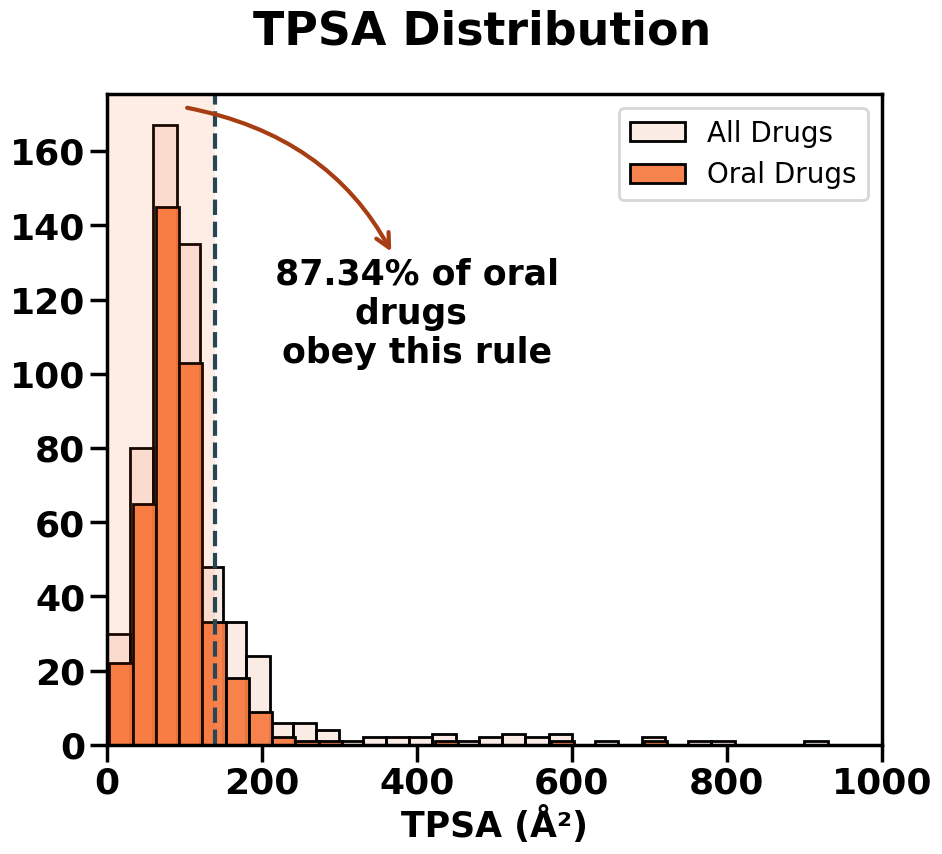

In [13]:
fig, ax = plt.subplots(figsize=(10, 8.45))

dist_graph(
    df=drugs_db_route_merged,
    df_oral=drugs_oral,
    col_name="tpsa",
    title="TPSA Distribution",
    xlabel="TPSA (Å²)",
    binwidth=30,
    threshold=140,
    xlim=(0, 1000),
    ax=ax,
    fig=fig,
    legend_position='upper right'
)

# annotating the information about how % obey the lipinski's rules
param = ((drugs_oral.tpsa <= 140).sum())/drugs_oral.shape[0]

ax.annotate(f' {param:.2%} of oral \ndrugs \nobey this rule',
            xy=(0.1, 0.98), xycoords='axes fraction',
            xytext=(0.4, 0.75), textcoords='axes fraction',
            arrowprops={"arrowstyle": "<-",
                        "color": color_palette["arrow"], "lw": 3, "connectionstyle": "arc3,rad=0.3"},
            horizontalalignment='center',
            verticalalignment='top', fontsize=25, fontweight=1000)
# saving plot
fig.savefig("../imgs/veber/dist_tpsa_oral.png", dpi=300)

plt.show()

### Rotatable bonds

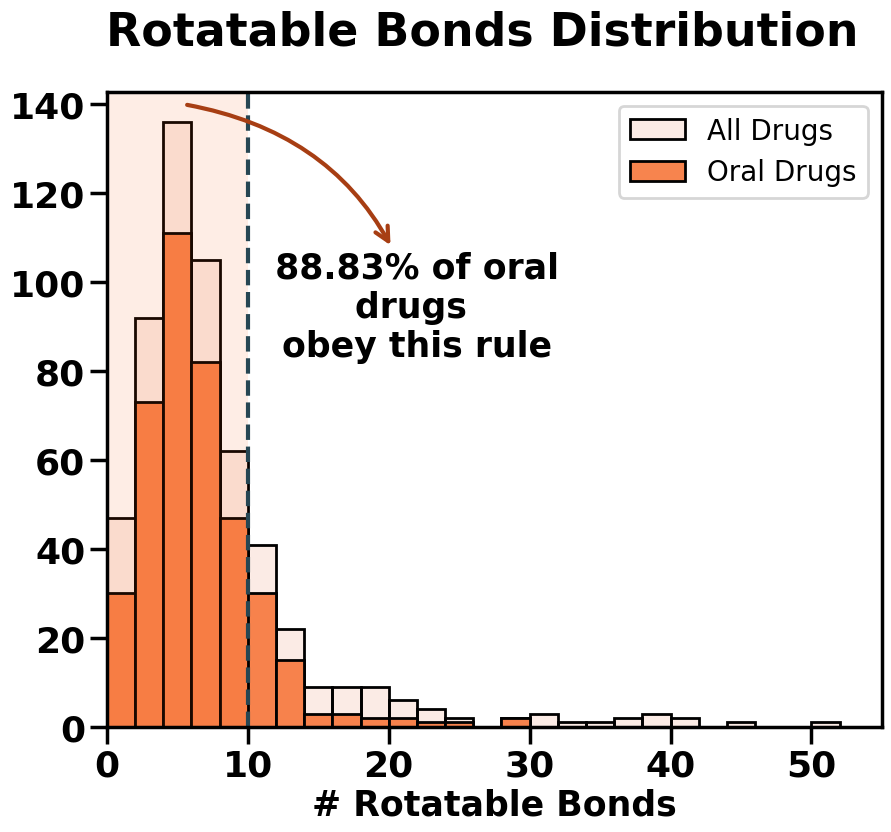

In [14]:
fig, ax = plt.subplots(figsize=(10, 8.25))

dist_graph(
    df=drugs_db_route_merged,
    df_oral=drugs_oral,
    col_name="rb",
    title="Rotatable Bonds Distribution",
    xlabel="# Rotatable Bonds",
    binwidth=2,
    threshold=10,
    xlim=(0, 55),
    ax=ax,
    fig=fig,
    legend_position='upper right'
)

# annotating the information about how % obey the lipinski's rules
param = ((drugs_oral.rb <= 10).sum())/drugs_oral.shape[0]
ax.annotate(f' {param:.2%} of oral \ndrugs \nobey this rule',
            xy=(0.1, 0.98), xycoords='axes fraction',
            xytext=(0.4, 0.75), textcoords='axes fraction',
            arrowprops={"arrowstyle": "<-",
                        "color": color_palette["arrow"], "lw": 3, "connectionstyle": "arc3,rad=0.3"},
            horizontalalignment='center',
            verticalalignment='top', fontsize=25, fontweight=1000)
# saving plot
fig.savefig("../imgs/veber/dist_rb_oral.png", dpi=300)

### Total H-Bond count

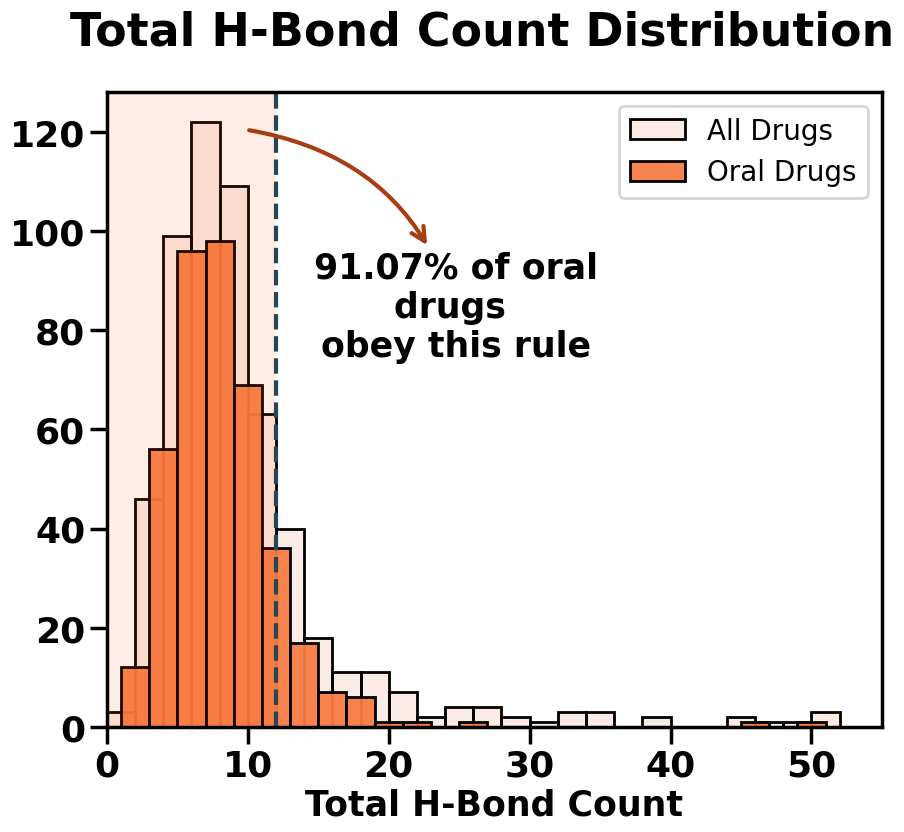

In [15]:
fig, ax = plt.subplots(figsize=(10,8.25))

dist_graph(
    df=drugs_db_route_merged,
    df_oral=drugs_oral,
    col_name="h_sum",
    title="Total H-Bond Count Distribution",
    xlabel="Total H-Bond Count",
    binwidth=2,
    threshold=12,
    xlim=(0, 55),
    ax=ax,
    fig=fig,
    legend_position='upper right'

)

# annotating the information about how % obey the lipinski's rules
param = ((drugs_oral.h_sum <= 12).sum())/drugs_oral.shape[0]

ax.annotate(f' {param:.2%} of oral \ndrugs \nobey this rule',
            xy=(0.18, 0.94), xycoords='axes fraction',
            xytext=(0.45, 0.75), textcoords='axes fraction',
            arrowprops={"arrowstyle": "<-",
                        "color": color_palette["arrow"], "lw": 3, "connectionstyle": "arc3,rad=0.3"},
            horizontalalignment='center',
            verticalalignment='top', fontsize=25, fontweight=1000)
# saving plot
fig.savefig("../imgs/veber/dist_h_sum_oral.png", dpi=300)

plt.show()

## Countplots:

### Lipinski:

In [16]:
color_palette = lipinski_pallete

In [17]:
# We create a boolean for obeying all the lipinski rules
lipinski = (drugs_db_route_merged.mw <= 500) & (drugs_db_route_merged.n_hbd <= 5) & (drugs_db_route_merged.n_hba <= 10) & (drugs_db_route_merged.logp <= 5)
# Printing the percentage
print(f"Percentage of FDA approved drugs that followed all of Lipinki's rule of five: "
      f"{drugs_db_route_merged[lipinski].shape[0] / drugs_db_route_merged.shape[0] * 100:.2f}%")

# We create a boolean for obeying all the lipinski rules
lipinski = (drugs_oral.mw <= 500) & (drugs_oral.n_hbd <= 5) & (drugs_oral.n_hba <= 10) & (drugs_oral.logp <= 5)
# Printing the percentage
print(f"Percentage of FDA approved oral drugs that followed all of Lipinki's rule of five: "
      f"{drugs_oral[lipinski].shape[0] / drugs_oral.shape[0] * 100:.2f}%")

Percentage of FDA approved drugs that followed all of Lipinki's rule of five: 60.21%
Percentage of FDA approved oral drugs that followed all of Lipinki's rule of five: 66.50%


In [18]:
# Creating a column for each rule of the lipinski's rule of five
drugs_db_route_merged["lipinski_mw"] = drugs_db_route_merged.mw <= 500
drugs_db_route_merged["lipinski_hbd"] = drugs_db_route_merged.n_hbd <= 5
drugs_db_route_merged["lipinski_hba"] = drugs_db_route_merged.n_hba <= 10
drugs_db_route_merged["lipinski_logp"] = drugs_db_route_merged.logp <= 5

# Creating a column for each rule of the lipinski's rule of five
drugs_oral["lipinski_mw"] = drugs_oral.mw <= 500
drugs_oral["lipinski_hbd"] = drugs_oral.n_hbd <= 5
drugs_oral["lipinski_hba"] = drugs_oral.n_hba <= 10
drugs_oral["lipinski_logp"] = drugs_oral.logp <= 5

# How many rules were followed by each structure?
drugs_db_route_merged["n_follow_rules"] = drugs_db_route_merged.iloc[:,-4:].sum(axis = 1)

# How many rules were followed by each structure?
drugs_oral["n_follow_rules"] = drugs_oral.iloc[:,-4:].sum(axis = 1)

print(" Oral:",drugs_oral.shape, "\n\n Total: ", drugs_db_route_merged.shape)

 Oral: (403, 23) 

 Total:  (563, 23)


In [19]:
# Defining the function for the countplot
def countplot(df, df_oral, x, title, ylim, file_name, ax):
    COLOR_1 = color_palette["countplot_bar1"]
    COLOR_2 = color_palette["countplot_bar2"]

    # counting bins
    height_all = np.unique(df[x], return_counts=True)[1]
    height_oral = np.unique(df_oral[x], return_counts=True)[1]

    # creating x positions
    x_pos_all = []
    x_pos_oral = []
    x_ticks = []
    for i in range(len(height_all)):
        x_pos_all.append(i+0.17)
        x_pos_oral.append(i-0.17)
        x_ticks.append(i)


    # all drugs plot
    ax.bar(
        x=x_pos_all, 
        height=height_all, 
        color=COLOR_1, 
        label="All approved drugs", 
        width=0.3,
        linewidth=2,
        edgecolor="black"
    )

    # oral drugs plot
    ax.bar(
        x=x_pos_oral, 
        height=height_oral, 
        color=COLOR_2, 
        label="Only oral drugs", 
        width=-0.3,
        linewidth=2,
        edgecolor="black"
    )

    # Count of each bin
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(int(y)), (x.mean(), y), 
                ha='center', va='bottom', fontsize = 29, fontweight=1000) # set the alignment of the text

    # settings
    fig.suptitle(title, fontsize = 32, fontweight=1000)

    ax.set_xlabel("Number of rules followed", fontsize=29, fontweight=1000)
    ax.set_ylabel("")

    ax.set_ylim((0, ylim))

    ax.set_xticks(x_ticks)
    ax.set_yticks([i for i in range(0, ylim, 100)])

    plt.setp(ax.get_xticklabels(), fontsize=29, fontweight=627)
    plt.setp(ax.get_yticklabels(), fontsize=29, fontweight=624)

    font = matplotlib.font_manager.FontProperties(family="Arial", weight=1000, size=23)
    ax.legend(loc='upper left', prop=font)

    #saving plot
    fig.savefig(f"../imgs/{file_name}_oral.png", dpi=300)

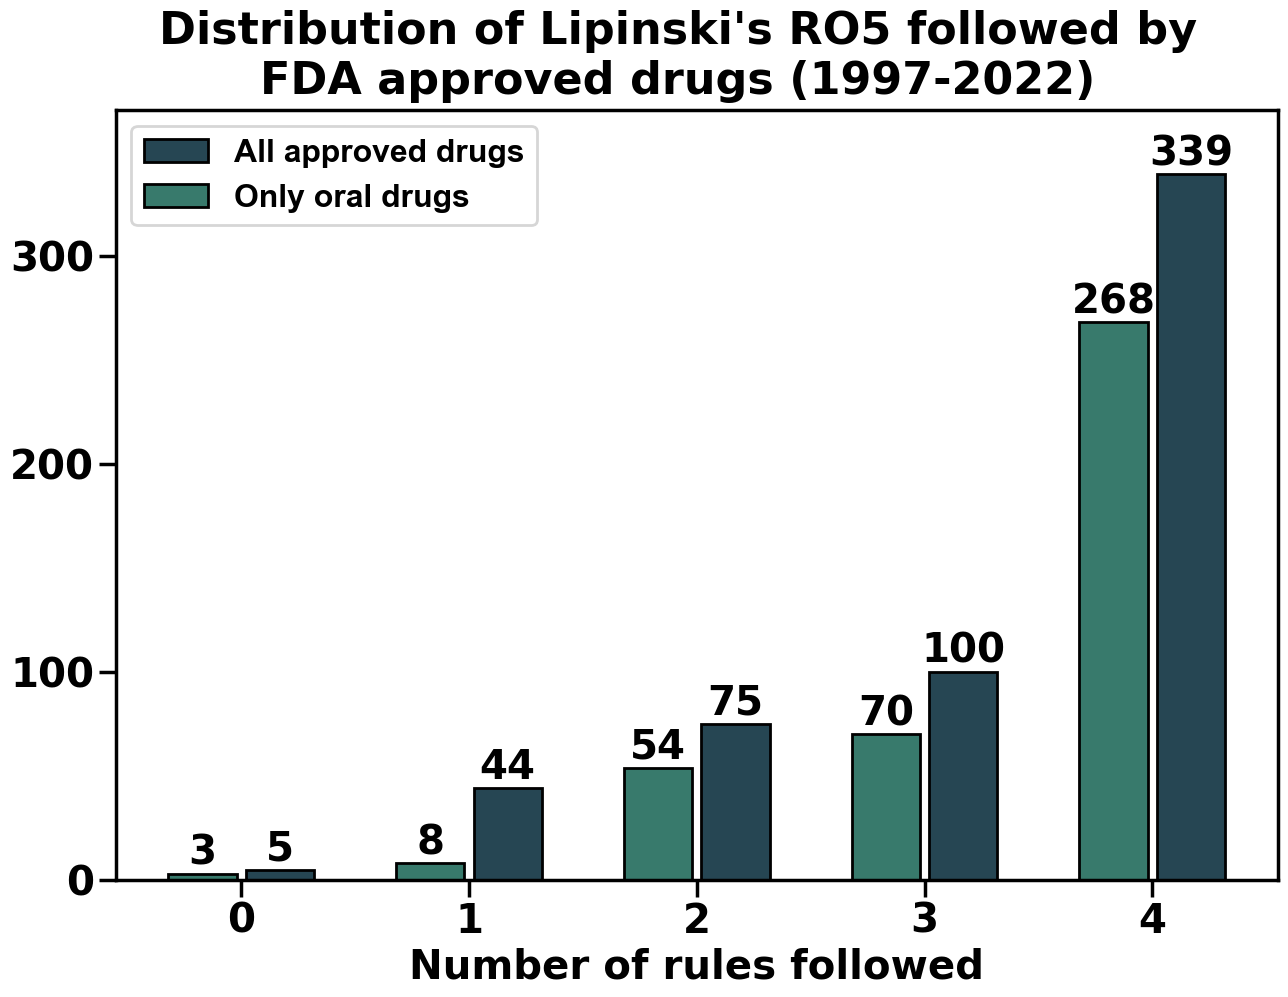

In [20]:
fig, ax = plt.subplots(figsize = (15,10))
countplot(
    df=drugs_db_route_merged, 
    df_oral=drugs_oral, 
    x="n_follow_rules",
    title="Distribution of Lipinski's RO5 followed by\nFDA approved drugs (1997-2022)",
    ylim=370,
    file_name="lipinski/countplot_n_follow_rules",
    ax=ax
)

In [21]:
print(drugs_oral.shape[0])
print(f" Number of oral drugs that follow 4 rules is {(drugs_oral.n_follow_rules == 4).sum()} which is {(((drugs_oral.n_follow_rules == 4).sum())/drugs_oral.shape[0]*100)} % of the total")
print(f" Number of oral drugs that follow 3 rules or more is {(drugs_oral.n_follow_rules >= 3 ).sum()} which is {((drugs_oral.n_follow_rules >= 3).sum())/drugs_oral.shape[0]*100} % of the total")
print(f" Number of oral drugs that follow 2 rules or more is {(drugs_oral.n_follow_rules >= 2 ).sum()} which is {((drugs_oral.n_follow_rules >= 2).sum())/drugs_oral.shape[0]*100} % of the total")

403
 Number of oral drugs that follow 4 rules is 268 which is 66.50124069478908 % of the total
 Number of oral drugs that follow 3 rules or more is 338 which is 83.87096774193549 % of the total
 Number of oral drugs that follow 2 rules or more is 392 which is 97.27047146401985 % of the total


### Veber

In [22]:
color_palette = veber_pallete

In [23]:
# Veber's rules
drugs_db_route_merged["follow_tpsa"] = (drugs_db_route_merged.tpsa <= 140).astype(int)
drugs_db_route_merged["follow_h_sum"] = (drugs_db_route_merged.h_sum <= 12).astype(int)
drugs_db_route_merged["follow_rb"] = (drugs_db_route_merged.rb <= 10).astype(int)
drugs_db_route_merged["follow_tpsa_or_h_sum"] = ((drugs_db_route_merged.tpsa <= 140) | (drugs_db_route_merged.h_sum <= 12)).astype(int)


# Veber's rules
drugs_oral["follow_tpsa"] = (drugs_oral.tpsa <= 140).astype(int)
drugs_oral["follow_h_sum"] = (drugs_oral.h_sum <= 12).astype(int)
drugs_oral["follow_rb"] = (drugs_oral.rb <= 10).astype(int)
drugs_oral["follow_tpsa_or_h_sum"] = ((drugs_oral.tpsa <= 140) | (drugs_oral.h_sum <= 12)).astype(int)

# How many rules were followed by each structure?
drugs_db_route_merged["n_follow_rules_veber"] = drugs_db_route_merged.iloc[:,-2:].sum(axis = 1)

# # How many rules were followed by each structure?
drugs_oral["n_follow_rules_veber"] = drugs_oral.iloc[:,-2:].sum(axis = 1)

In [24]:
print(drugs_db_route_merged.columns)
drugs_oral.columns

Index(['active_ingredient_moiety', 'nda_bla', 'approval_year', 'active',
       'DrugBank ID', 'Drug Groups', 'SMILES', 'Name', 'Drug Type', 'route',
       'mw', 'n_hba', 'n_hbd', 'logp', 'tpsa', 'rb', 'h_sum', 'countplot',
       'lipinski_mw', 'lipinski_hbd', 'lipinski_hba', 'lipinski_logp',
       'n_follow_rules', 'follow_tpsa', 'follow_h_sum', 'follow_rb',
       'follow_tpsa_or_h_sum', 'n_follow_rules_veber'],
      dtype='object')


Index(['active_ingredient_moiety', 'nda_bla', 'approval_year', 'active',
       'DrugBank ID', 'Drug Groups', 'SMILES', 'Name', 'Drug Type', 'route',
       'mw', 'n_hba', 'n_hbd', 'logp', 'tpsa', 'rb', 'h_sum', 'countplot',
       'lipinski_mw', 'lipinski_hbd', 'lipinski_hba', 'lipinski_logp',
       'n_follow_rules', 'follow_tpsa', 'follow_h_sum', 'follow_rb',
       'follow_tpsa_or_h_sum', 'n_follow_rules_veber'],
      dtype='object')

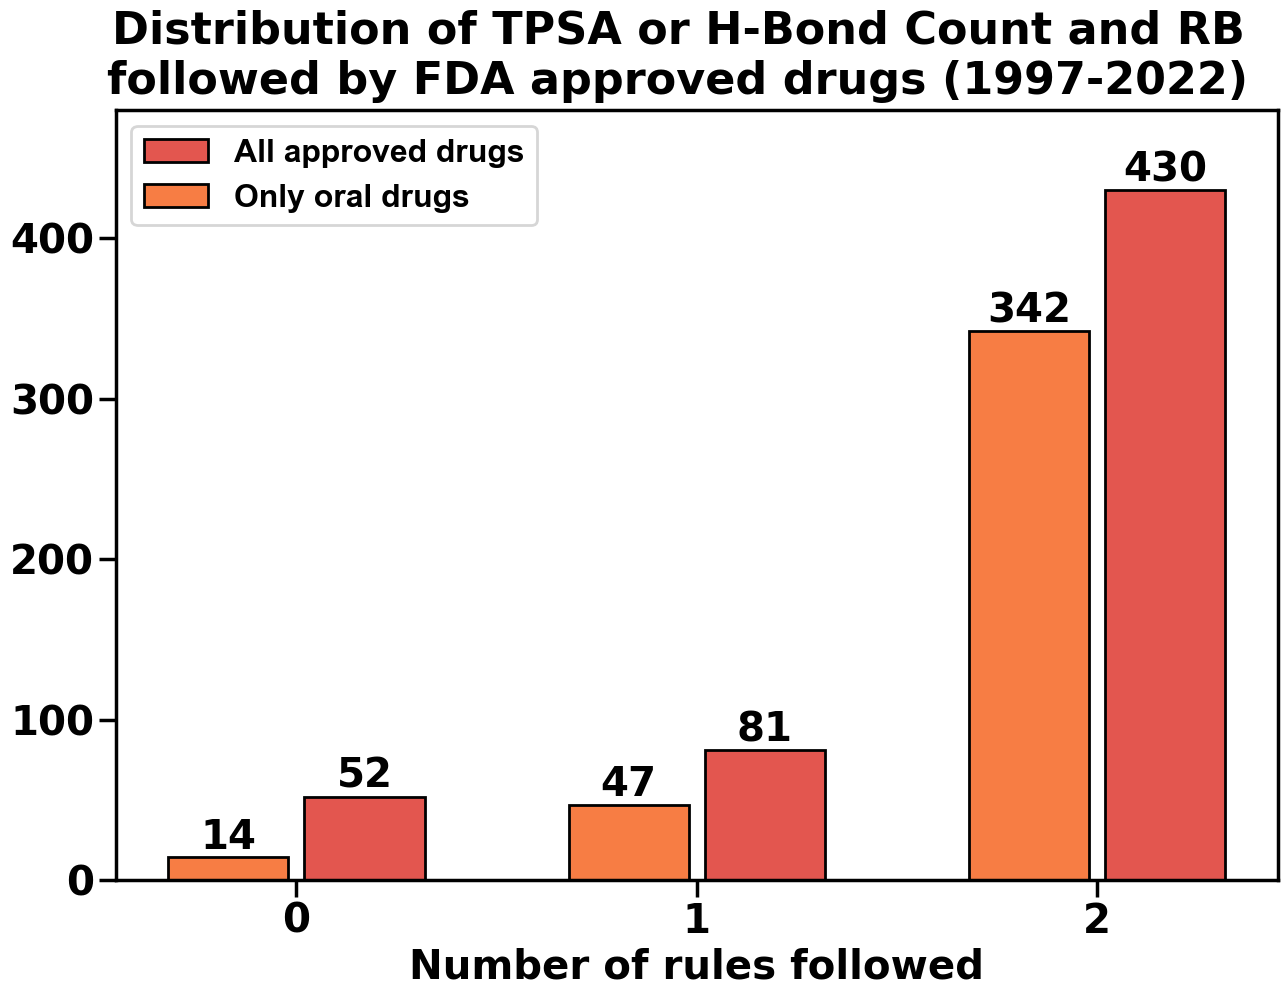

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
countplot(
    df=drugs_db_route_merged, 
    df_oral=drugs_oral, 
    x="n_follow_rules_veber",
    title="Distribution of TPSA or H-Bond Count and RB\nfollowed by FDA approved drugs (1997-2022)",
    ylim=480,
    file_name="veber/countplot_n_follow_rules_veber",
    ax=ax)

In [26]:
drugs_oral[["n_hba", "n_hbd", "mw", "logp", "tpsa", "rb", "h_sum"]].describe()

,n_hba,n_hbd,mw,logp,tpsa,rb,h_sum
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,5.980149,2.131514,437.235643,3.224003,98.550571,6.354839,8.111663
std,4.012989,3.338316,251.236158,2.276498,97.420363,8.177182,6.871959
min,1.000000,0.000000,94.053098,-11.627860,3.240000,0.000000,1.000000
25%,4.000000,1.000000,322.100312,2.079450,66.440000,3.000000,5.000000
50%,6.000000,2.000000,417.096808,3.310000,87.550000,5.000000,7.000000
75%,7.000000,3.000000,497.227423,4.714300,109.315000,8.000000,9.000000
max,56.000000,57.000000,4111.115377,8.948000,1646.180000,149.000000,113.000000


In [29]:
drugs_oral[drugs_oral["n_follow_rules_veber"] == 0][['active']]

,active
73,tenofovir disoproxil
82,adefovir dipivoxil
93,atazanavir
103,telithromycin
179,fidaxomicin
195,linaclotide
242,isavuconazonium
260,venetoclax
264,plecanatide
284,semaglutide
